# Домашнее задание 5

In [1]:
import kagglehub # Код с кагла

# Download latest version
path = kagglehub.dataset_download("idowuadamo/students-performance-in-2024-jamb")

print("Path to dataset files:", path)

100%|██████████| 74.9k/74.9k [00:00<00:00, 21.5MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/idowuadamo/students-performance-in-2024-jamb/versions/1


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

df = pd.read_csv(path + "/jamb_exam_results.csv")
df.head()

,JAMB_Score,Study_Hours_Per_Week,Attendance_Rate,Teacher_Quality,Distance_To_School,School_Type,School_Location,Extra_Tutorials,Access_To_Learning_Materials,Parent_Involvement,IT_Knowledge,Student_ID,Age,Gender,Socioeconomic_Status,Parent_Education_Level,Assignments_Completed
0,192,22,78,4,12.4,Public,Urban,Yes,Yes,High,Medium,1,17,Male,Low,Tertiary,2
1,207,14,88,4,2.7,Public,Rural,No,Yes,High,High,2,15,Male,High,NaN,1
2,182,29,87,2,9.6,Public,Rural,Yes,Yes,High,Medium,3,20,Female,High,Tertiary,2
3,210,29,99,2,2.6,Public,Urban,No,Yes,Medium,High,4,22,Female,Medium,Tertiary,1
4,199,12,98,3,8.8,Public,Urban,No,Yes,Medium,Medium,5,22,Female,Medium,Tertiary,1


# Подготовка данных

In [11]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [12]:
df = df.drop(columns=['student_id'], axis=1)

In [13]:
df = df.fillna(0)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   jamb_score                    5000 non-null   int64  
 1   study_hours_per_week          5000 non-null   int64  
 2   attendance_rate               5000 non-null   int64  
 3   teacher_quality               5000 non-null   int64  
 4   distance_to_school            5000 non-null   float64
 5   school_type                   5000 non-null   object 
 6   school_location               5000 non-null   object 
 7   extra_tutorials               5000 non-null   object 
 8   access_to_learning_materials  5000 non-null   object 
 9   parent_involvement            5000 non-null   object 
 10  it_knowledge                  5000 non-null   object 
 11  age                           5000 non-null   int64  
 12  gender                        5000 non-null   object 
 13  soc

In [16]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.jamb_score.values
y_val = df_val.jamb_score.values
y_test = df_test.jamb_score.values

del df_train['jamb_score']
del df_val['jamb_score']
del df_test['jamb_score']


dv = DictVectorizer(sparse=True)

train_dicts = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dicts)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

# Вопрос 1 <br>
Какой признак используется для разбиения данных?

`study_hours_per_week`<br>
`attendance_rate`<br>
`teacher_quality`<br>
`distance_to_school`<br>


In [40]:
dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)
an = export_text(dt, feature_names=dv.get_feature_names_out())
an = list(an.split('\n'))
an = an[0]
an = list(an.split())
an = an[1]

print("Ответ:", an)

Ответ: study_hours_per_week


# Вопрос 2

Какое значение RMSE у этой модели на валидационных данных?

`22.13`<br>
`42.13`<br>
`62.13`<br>
`82.12`<br>

In [27]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE на валидации: {rmse:.2f}")

RMSE на валидации: 42.14


# Вопрос 3

После какого значения n_estimators RMSE перестает улучшаться? Учтите точность до 3 знаков после запятой.

`10`<br>
`25`<br>
`80`<br>
`200`

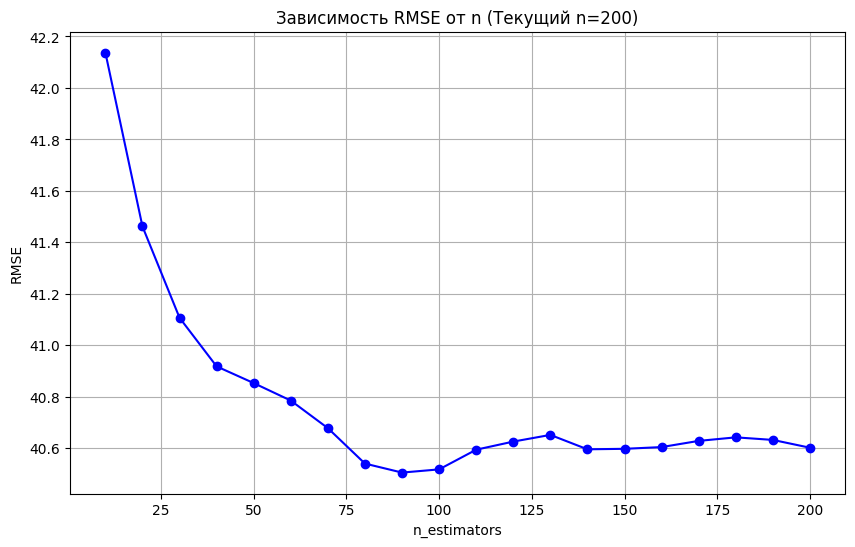

In [29]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
scores = []

for n in range(10, 201, 10):
    rf = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    scores.append((n, rmse))
    clear_output(wait=True)
    plt.figure(figsize=(10, 6))

    x_vals = [x[0] for x in scores]
    y_vals = [x[1] for x in scores]

    plt.plot(x_vals, y_vals, marker='o', linestyle='-', color='b')

    plt.title(f'Зависимость RMSE от n (Текущий n={n})')
    plt.xlabel('n_estimators')
    plt.ylabel('RMSE')
    plt.grid(True)
    plt.show()

In [36]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'rmse'])

min_row = df_scores['rmse'].idxmin()

best_n = df_scores['n_estimators'][min_row]

print("Ответ: после ", best_n-10)


Ответ: после  80


# Вопрос 4

Выберите лучшее значение max_depth:

Попробуйте значения max_depth: `[10, 15, 20, 25]`.
Для каждого значения попробуйте `n_estimators` от 10 до 200 (с шагом 10).
Рассчитайте среднее значение RMSE.
Установите `random_state=1`.
Какое значение `max_depth` оказалось лучшим по среднему `RMSE`?

`10`<br>
`15`<br>
`20`<br>
`25`

In [38]:
mean_rmses = {}

for depth in [10, 15, 20, 25]:
    print(f"Processing max_depth={depth}...")
    rmse_values = []

    rf = RandomForestRegressor(
        n_estimators=0,
        max_depth=depth,
        random_state=1,
        n_jobs=-1,
        warm_start=True
    )

    for n in range(10, 201, 10):
        rf.n_estimators = n
        rf.fit(X_train, y_train)

        y_pred = rf.predict(X_val)
        rmse = np.sqrt(mean_squared_error(y_val, y_pred))
        rmse_values.append(rmse)

    mean_rmse = np.mean(rmse_values)
    mean_rmses[depth] = mean_rmse
    print(f"--> Mean RMSE: {mean_rmse:.5f}")


print("-" * 30)
best_depth = min(mean_rmses, key=mean_rmses.get)
print(f"Лучший max_depth: {best_depth}")

Processing max_depth=10...
--> Mean RMSE: 40.39250
Processing max_depth=15...
--> Mean RMSE: 40.73528
Processing max_depth=20...
--> Mean RMSE: 40.73973
Processing max_depth=25...
--> Mean RMSE: 40.78787
------------------------------
Лучший max_depth: 10


# Вопрос 5
Какой признак оказался самым важным (из этих четырех)?

`study_hours_per_week`<br>
`attendance_rate`<br>
`distance_to_school`<br>
`teacher_quality`<br>

In [39]:
rf = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = dv.get_feature_names_out()

print("Топ важных признаков:")
for i in range(5):
    idx = indices[i]
    print(f"{feature_names[idx]}: {importances[idx]:.4f}")

Топ важных признаков:
study_hours_per_week: 0.2484
attendance_rate: 0.1497
distance_to_school: 0.1365
teacher_quality: 0.0827
age: 0.0693


# Ответы на вопросы

1. **Ответ**: `study_hours_per_week`

2. **Ответ**: `42.13`

3. **Ответ**: `после  80`

4. **Ответ**: `Лучший max_depth: 10`

5. **Ответ**: `study_hours_per_week`
